In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

%matplotlib inline






# Faire une regression linéaire par descente de gradient

## 1- Générer des données et les afficher
Générer et afficher 100 points de coordonnées $(x_i,y_i)$ tels que 

$\forall i,\;x_i \in \mathbb{R}$ soit tiré uniformément sur [0 5] 

et $\forall i,\;y_i$ soit tirés à une distance d'un bruit gaussien de la droite d'équation $y=3.14*x+2.7$ 

Ce bruit gaussien a pour moyenne 0 et son l'écart-type vaut 1 $N(0,1)$


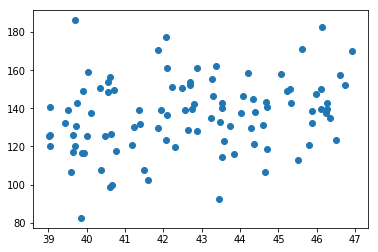

In [2]:
#ce code est faux mais utile
x=np.random.uniform(39,47,100)
y=np.random.normal(0,20,100)+3.14*x+2.7
plt.scatter(x,y)

## 2- Initialiser notre modèle linéaire
Générer avec une loi normale $N(0,1)$ les paramètres de notre modèle liniéaire $y = a.x +b$

Afficher la droite sur le plot.


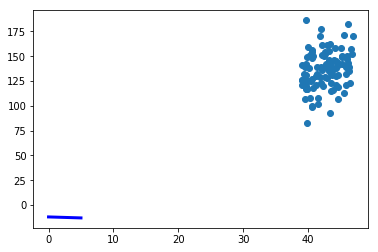

In [3]:
#C'est presque bon
a=-5
b=-12
xx=[0, 5]
yy=[b, 5*a-b]
plt.scatter(x,y)
plt.plot(xx, yy, color='blue', linewidth=3)


## 3- Machine Learning

(A faire pour K = 1 , 10 , 100 ainsi que pour $\gamma$ = 1 , 0.1 , 0.01)

Faire une boucle de 20 itérations :

    -affiche la droite

    -sélectionner aléatoirement K points parmis les 100

    -update paramètres
  
   
Pour le calcul de l'update :

$\frac{\partial{E_{\Omega}}}{\partial{a}} = \frac{1}{n}\sum_{i=[1..n]}(a.x_i+b - y_i^*).x_i$
   
$\frac{\partial{E_{\Omega}}}{\partial{b}} = \frac{1}{n}\sum_{i=[1..n]}(a.x_i+b - y_i^*)$ 
 

$a \leftarrow a - \gamma.\frac{\partial{E_{\Omega}}}{\partial{a}}$

$b \leftarrow b - \gamma.\frac{\partial{E_{\Omega}}}{\partial{b}}$

 


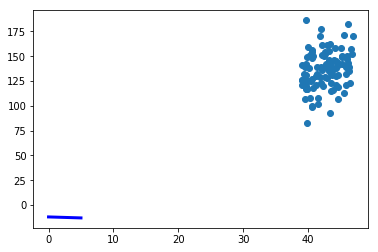

a =  -5
b =  -12
x_selec =  [42.30380433 43.57725923 39.69254722 39.65763312 41.39244904]
y_selec =  [119.82298899 122.8832025  186.19029168 117.22701005 131.64418936]


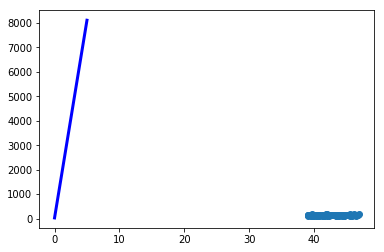

a =  1627.0388276866668
b =  24.60406791048139
x_selec =  [44.69418477 43.84687573 39.84546914 46.92639098 39.42659427]
y_selec =  [140.73489895 115.9817866   82.54202398 170.20671948 132.44034732]


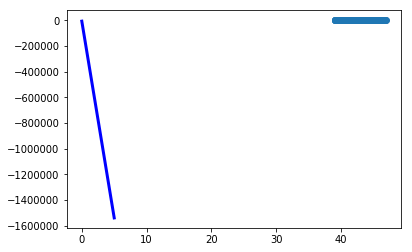

a =  -309198.9204010358
b =  -7081.528236939744
x_selec =  [40.67662825 39.88700523 40.55158431 39.69342284 40.36926861]
y_selec =  [ 99.55989045 116.77909172 153.91529794 120.2830898  107.55501017]


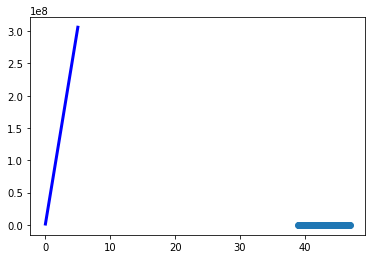

a =  61487733.83804217
b =  1375580.0658947101
x_selec =  [45.97546181 44.32941296 41.60957393 39.65763312 41.85102113]
y_selec =  [147.63158807 144.76379692 102.2286093  117.22701005 129.48802826]


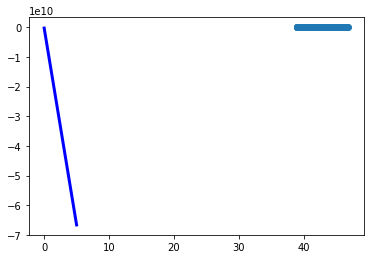

a =  -13378381777.502268
b =  -286162696.95012
x_selec =  [46.50372966 43.53765063 41.85516424 45.88062257 42.09738612]
y_selec =  [123.27224579 140.06339608 170.41366401 132.33254442 161.20406675]


In [4]:
#Tout est bon mais il en manque pour K > 1
gamma = 0.1
k = 5
nb_it = 5

cpt = 0
while cpt < nb_it :
    plt.scatter(x,y)
    plt.plot(xx, yy, color='blue', linewidth=3)
    plt.show()
    print('a = ',a)
    print('b = ',b)
    #Selectionner des exemples
    selec = np.random.permutation(100)[0:k]
    print('x_selec = ' ,x[selec])
    print('y_selec = ' ,y[selec])
    #Selectionner un exemple 
    i=np.random.randint(0,100)
    x_selec = x[i]
    y_selec = y[i]
    y_pred= a*x_selec+b
    #L'update des paramètres (formule à étendre pour K > 1)
    da = (y_pred-y_selec)*x_selec
    a = a - gamma*da
    db = (y_pred-y_selec)
    b= b - gamma*db
    #Mise à jour de notre droite à afficher
    yy=[b, 5*a-b]
    cpt = cpt+ 1

# Questions

-Quel est l'effet du learning rate $\gamma$ ? 
-Quel est l'effet de K ?
-Pour deux K, comment comparer rationnelement les performances ?



# La pizza

Prenons comme exemple le prix des pizzas par diametre.

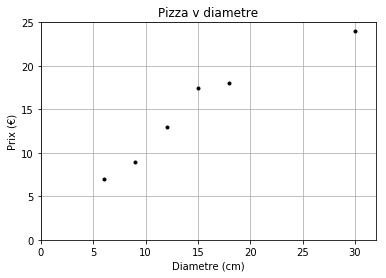

In [5]:
Diametre = [[6], [9], [12], [15], [18], [30]]
prix = [[7], [9], [13], [17.5], [18], [24]]
plt.figure()
plt.title('Pizza v diametre')
plt.xlabel('Diametre (cm)')
plt.ylabel(u'Prix (€)')
plt.plot(Diametre, prix, 'k.')
plt.axis([0, 32, 0, 25])
plt.grid(True)
plt.show()

Et si on trouvait une pizza de 25 cm de diametre.  Quel serait un prix raisonnable selon notre modèle?

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = Diametre
y = prix
model.fit(X, y)
print(u'Un pizza de 25 cm doit coûter ' , model.predict([[25]]) , '€')

Un pizza de 25 cm doit coûter  [[21.91666667]] €


La class `sklearn.linear_model.LinearRegression` est un estimateur (_estimator_).  Un estimateur prédit une valeur à partir de données observées.  Brèf, ça crée un modèle.

Tous les estimateurs en scikit-learn implémentent les méthodes `fit()` et `predict()`.

# Example : le diabète

    Scikit-learn propose d'ensemble de données jouets.

Coefficients: 
 [938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


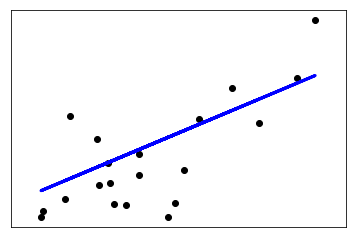

In [7]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()